<a href="https://colab.research.google.com/github/SaiTejaPortfolioDS/Conagra-Brands-Meat-Substitute-Analysis/blob/main/Final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df= pd.read_excel('Top_5_Meat_Substitute_With_Category_Info.xlsx')

In [ ]:
df.head()

,geography,time,product,upc 13 digit,unit sales,unit sales no merch,unit sales any merch,unit sales price reductions only,unit sales feature only,unit sales display only,...,date,season,category,sub_category,flavor,meat_source,form,aisle_name,total_count,total_ounces
0,Total US - Multi Outlet + Conv,Week Ending 01-12-20,MORNINGSTAR FARMS FROZEN TOMATO AND BASIL PIZZ...,28989055101,1497.478415,1497.478415,NaN,NaN,NaN,NaN,...,2020-01-12,Winter,SUBSTITUTE MEAT/POULTRY/SEAFOOD - FZ/RFG,FZ MEAT SUBSTITUTES,TOMATO & BASIL PIZZA,NaN,BURGER,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,4,9.5
1,Total US - Multi Outlet + Conv,Week Ending 01-19-20,MORNINGSTAR FARMS FROZEN TOMATO AND BASIL PIZZ...,28989055101,1503.439903,1503.439903,NaN,NaN,NaN,NaN,...,2020-01-19,Winter,SUBSTITUTE MEAT/POULTRY/SEAFOOD - FZ/RFG,FZ MEAT SUBSTITUTES,TOMATO & BASIL PIZZA,NaN,BURGER,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,4,9.5
2,Total US - Multi Outlet + Conv,Week Ending 01-26-20,MORNINGSTAR FARMS FROZEN TOMATO AND BASIL PIZZ...,28989055101,1031.530724,1031.530724,NaN,NaN,NaN,NaN,...,2020-01-26,Winter,SUBSTITUTE MEAT/POULTRY/SEAFOOD - FZ/RFG,FZ MEAT SUBSTITUTES,TOMATO & BASIL PIZZA,NaN,BURGER,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,4,9.5
3,Total US - Multi Outlet + Conv,Week Ending 02-02-20,MORNINGSTAR FARMS FROZEN TOMATO AND BASIL PIZZ...,28989055101,880.250986,880.250986,NaN,NaN,NaN,NaN,...,2020-02-02,Winter,SUBSTITUTE MEAT/POULTRY/SEAFOOD - FZ/RFG,FZ MEAT SUBSTITUTES,TOMATO & BASIL PIZZA,NaN,BURGER,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,4,9.5
4,Total US - Multi Outlet + Conv,Week Ending 02-09-20,MORNINGSTAR FARMS FROZEN TOMATO AND BASIL PIZZ...,28989055101,926.025805,926.025805,NaN,NaN,NaN,NaN,...,2020-02-09,Winter,SUBSTITUTE MEAT/POULTRY/SEAFOOD - FZ/RFG,FZ MEAT SUBSTITUTES,TOMATO & BASIL PIZZA,NaN,BURGER,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,4,9.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 71 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   geography                                        21983 non-null  object        
 1   time                                             21983 non-null  object        
 2   product                                          21983 non-null  object        
 3   upc 13 digit                                     21983 non-null  int64         
 4   unit sales                                       21983 non-null  float64       
 5   unit sales no merch                              21454 non-null  float64       
 6   unit sales any merch                             18875 non-null  float64       
 7   unit sales price reductions only                 17878 non-null  float64       
 8   unit sales feature only             

In [ ]:
df.isnull().sum()

geography           0
time                0
product             0
upc 13 digit        0
unit sales          0
                ...  
meat_source     21983
form                0
aisle_name          0
total_count         0
total_ounces        0
Length: 71, dtype: int64

In [ ]:
df = df.drop('meat_source', axis=1)

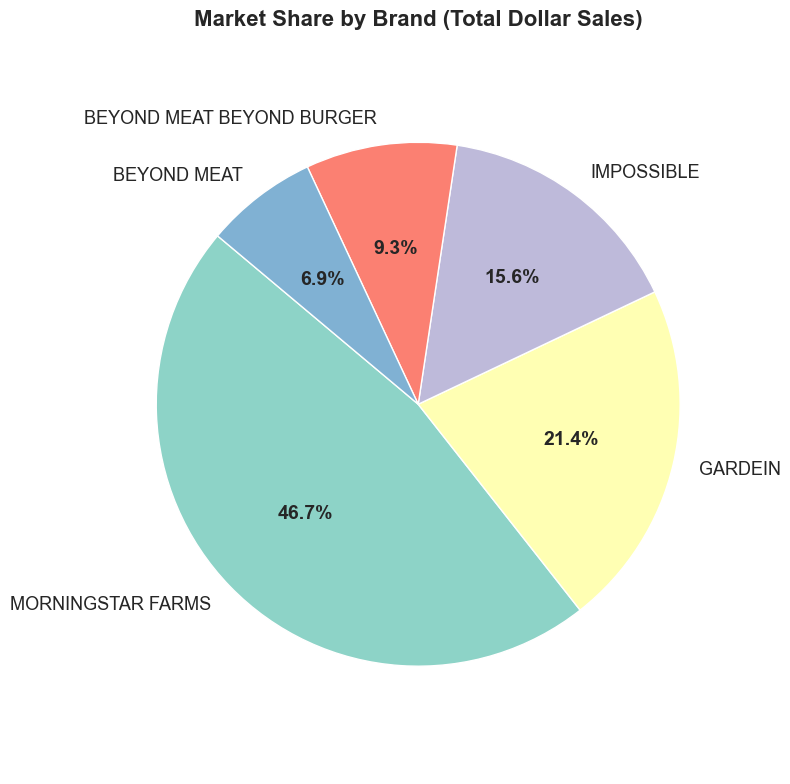

In [ ]:
# Group and sort dollar sales by brand
brand_sales = df.groupby("brand name")["unit sales"].sum().sort_values(ascending=False)

# Set up the pie chart
plt.figure(figsize=(8, 8))
colors = plt.get_cmap('Set3').colors

# Create pie chart
wedges, texts, autotexts = plt.pie(
    brand_sales.values,
    labels=brand_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors[:len(brand_sales)],
    textprops={'fontsize': 13}  # Font size for brand names
)

# Adjust % labels (autotexts)
for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_weight('bold')

# Title
plt.title("Market Share by Brand (Total Dollar Sales)", fontsize=16, fontweight='bold')

# Keep aspect ratio
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
categorical_columns = ['season', 'category', 'sub_category', 'flavor', 'form']

In [ ]:
# Flavors Gardein offers
gardein_flavors = df[df["brand name"].str.contains("Gardein", case=False)]["flavor"].unique()

# Top flavors across all brands
top_flavors = flavor_sales.sort_values(ascending=False).head(5).index

# Flavors Gardein does not have
missing_flavors = [flavor for flavor in top_flavors if flavor not in gardein_flavors]
print("High-performing flavors missing in Gardein:", missing_flavors)

High-performing flavors missing in Gardein: ['BACON', 'SPICY BLACK BEAN', 'BUFFALO']


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

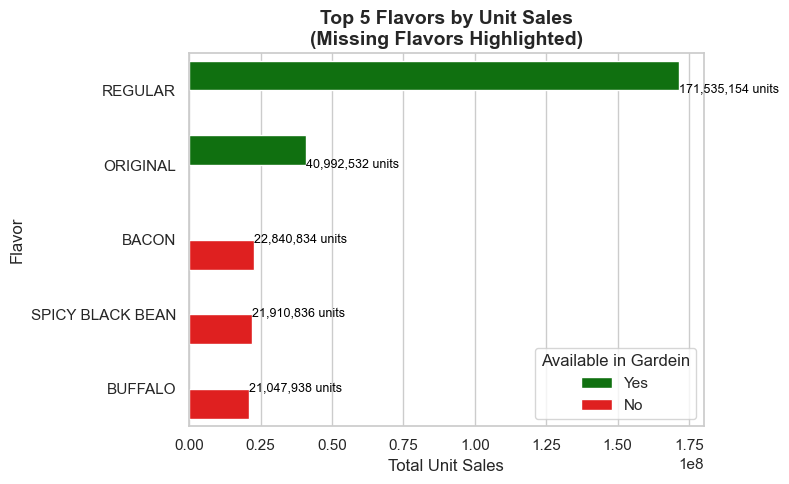

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# STEP 1: Group by flavor and calculate total unit sales
flavor_sales = df.groupby("flavor")["unit sales"].sum().sort_values(ascending=False)

# STEP 2: Identify flavors offered by Gardein
gardein_flavors = df[df["brand name"].str.contains("Gardein", case=False)]["flavor"].unique()

# STEP 3: Get top 5 flavors overall by unit sales
top_flavors = flavor_sales.head(5)

# STEP 4: Create a DataFrame for plotting
top_flavors_df = top_flavors.reset_index()
top_flavors_df.columns = ["flavor", "unit sales"]
top_flavors_df["Available in Gardein"] = top_flavors_df["flavor"].apply(lambda x: "Yes" if x in gardein_flavors else "No")

# STEP 5: Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=top_flavors_df, x="unit sales", y="flavor", hue="Available in Gardein", palette={"Yes": "green", "No": "red"})
plt.title("Top 5 Flavors by Unit Sales\n(Missing Flavors Highlighted)", fontsize=14, fontweight='bold')
plt.xlabel("Total Unit Sales")
plt.ylabel("Flavor")
plt.legend(title="Available in Gardein")

for i, row in top_flavors_df.iterrows():
    ax.text(row["unit sales"] + 1500, i, f"{row['unit sales']:,.0f} units",
            ha='left', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15192\3639093527.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top_flavors, x="season", y="unit sales", hue="flavor", estimator="sum", ci=None)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_

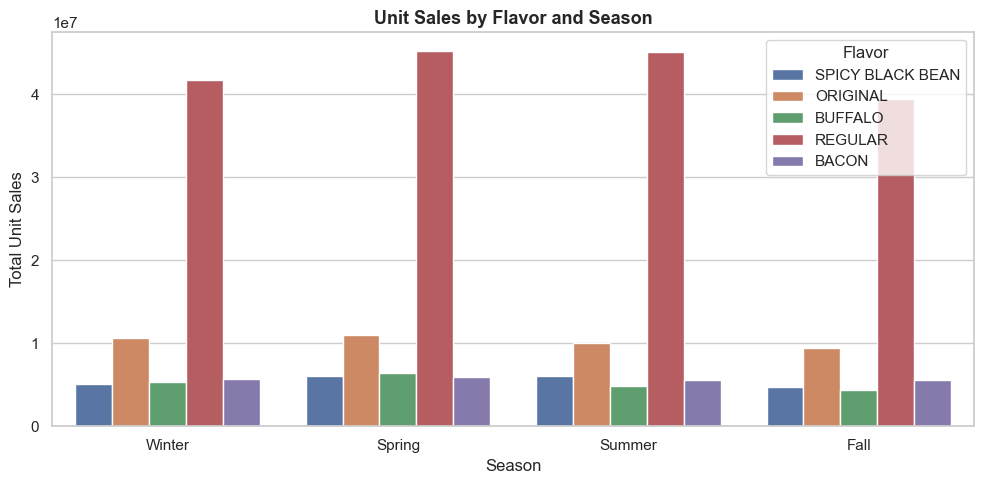

In [ ]:
top_flavors = df.groupby("flavor")["unit sales"].sum().sort_values(ascending=False).head(5).index

# Filter top flavors
df_top_flavors = df[df["flavor"].isin(top_flavors)]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=df_top_flavors, x="season", y="unit sales", hue="flavor", estimator="sum", ci=None)
plt.title("Unit Sales by Flavor and Season", fontsize=13, fontweight='bold')
plt.ylabel("Total Unit Sales")
plt.xlabel("Season")
plt.legend(title="Flavor")
plt.tight_layout()
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be chan

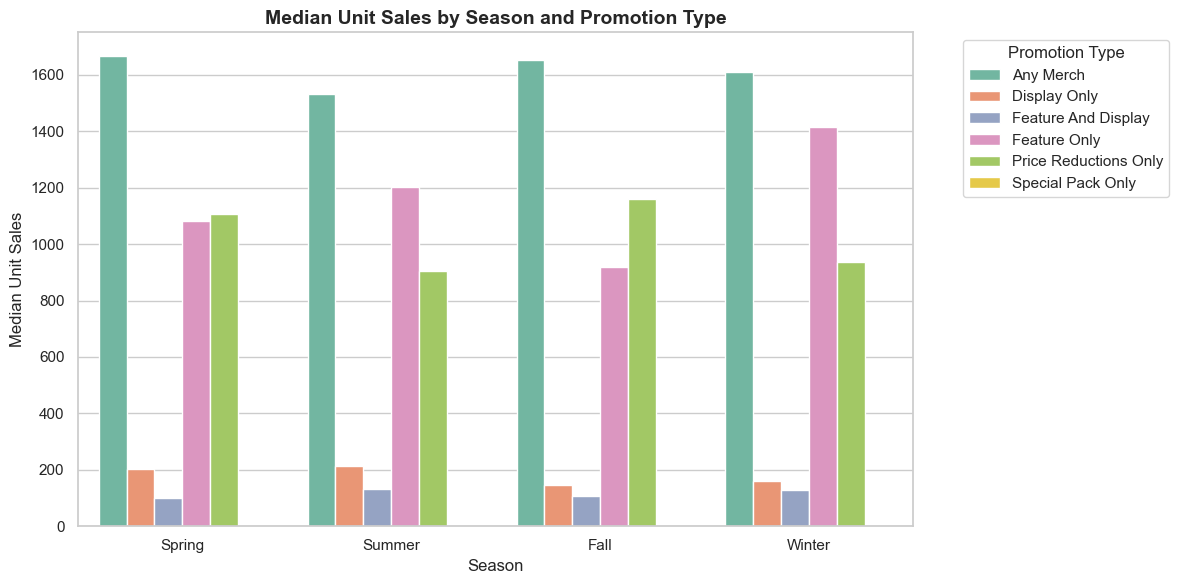

In [ ]:
# Define the promo columns to include (excluding 'no merch')
promo_cols = [
    'unit sales any merch',
    'unit sales price reductions only',
    'unit sales feature only',
    'unit sales display only',
    'unit sales special pack only',
    'unit sales feature and display'
]

# Melt for season × promo interaction
season_promo = df[["season"] + promo_cols].melt(id_vars="season",
                                                 var_name="Promotion Type",
                                                 value_name="Unit Sales")

# Clean promo labels
season_promo["Promotion Type"] = season_promo["Promotion Type"].str.replace("unit sales ", "").str.title()

# Calculate median unit sales by season × promo
seasonal_summary = season_promo.groupby(["season", "Promotion Type"])["Unit Sales"].median().reset_index()

# Order seasons if needed
season_order = ["Spring", "Summer", "Fall", "Winter"]
seasonal_summary["season"] = pd.Categorical(seasonal_summary["season"], categories=season_order, ordered=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_summary, x="season", y="Unit Sales", hue="Promotion Type", palette="Set2")

plt.title("Median Unit Sales by Season and Promotion Type", fontsize=14, fontweight='bold')
plt.xlabel("Season")
plt.ylabel("Median Unit Sales")
plt.legend(title="Promotion Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

In [ ]:
dummy_cols = [col for col in df_encoded.columns if any(cat + '_' in col for cat in categorical_columns)]

In [ ]:
df_encoded[dummy_cols] = df_encoded[dummy_cols].astype(int)

In [ ]:
# df_encoded.to_csv('One_Hot_Encoded_File.csv', index=False)

In [ ]:
df = pd.read_csv('One_Hot_Encoded_File.csv')

In [ ]:
df.isnull().sum()

geography       0
time            0
product         0
upc 13 digit    0
unit sales      0
               ..
form_SLIDER     0
form_STRIP      0
form_TENDER     0
form_TIP        0
form_WING       0
Length: 171, dtype: int64

In [ ]:
df['% Change in Sales due to merch'] = ((df['unit sales any merch'] - df['unit sales no merch'])/df['unit sales no merch'])*100

In [ ]:
df.head()

,geography,time,product,upc 13 digit,unit sales,unit sales no merch,unit sales any merch,unit sales price reductions only,unit sales feature only,unit sales display only,...,form_ROLL,form_SAUSAGE PATTY,form_SLICE,form_SLICED,form_SLIDER,form_STRIP,form_TENDER,form_TIP,form_WING,% Change in Sales due to merch
0,Total US - Multi Outlet + Conv,Week Ending 01-12-20,MORNINGSTAR FARMS FROZEN TOMATO AND BASIL PIZZ...,28989055101,1497.478415,1497.478415,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
1,Total US - Multi Outlet + Conv,Week Ending 01-19-20,MORNINGSTAR FARMS FROZEN TOMATO AND BASIL PIZZ...,28989055101,1503.439903,1503.439903,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
2,Total US - Multi Outlet + Conv,Week Ending 01-26-20,MORNINGSTAR FARMS FROZEN TOMATO AND BASIL PIZZ...,28989055101,1031.530724,1031.530724,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
3,Total US - Multi Outlet + Conv,Week Ending 02-02-20,MORNINGSTAR FARMS FROZEN TOMATO AND BASIL PIZZ...,28989055101,880.250986,880.250986,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
4,Total US - Multi Outlet + Conv,Week Ending 02-09-20,MORNINGSTAR FARMS FROZEN TOMATO AND BASIL PIZZ...,28989055101,926.025805,926.025805,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
# df.to_csv('Final Data.csv', index=False)

In [ ]:
df = pd.read_csv('Final Data.csv')

In [ ]:
df.dtypes

geography                                          object
time                                               object
product                                            object
upc 13 digit                                        int64
unit sales                                        float64
                                                   ...   
season_Winter × unit sales feature only           float64
season_Winter × unit sales display only           float64
season_Winter × unit sales special pack only      float64
season_Winter × unit sales feature and display    float64
% Change in Sales due to merch                    float64
Length: 708, dtype: object

In [ ]:
df.columns.to_list()

['geography',
 'time',
 'product',
 'upc 13 digit',
 'unit sales',
 'unit sales no merch',
 'unit sales any merch',
 'unit sales price reductions only',
 'unit sales feature only',
 'unit sales display only',
 'unit sales special pack only',
 'unit sales feature and display',
 'volume sales',
 'volume sales no merch',
 'volume sales any merch',
 'volume sales price reductions only',
 'volume sales feature only',
 'volume sales display only',
 'volume sales special pack only',
 'volume sales feature and display',
 'dollar sales',
 'dollar sales no merch',
 'dollar sales any merch',
 'dollar sales price reductions only',
 'dollar sales feature only',
 'dollar sales display only',
 'dollar sales special pack only',
 'dollar sales feature and display',
 'price per unit',
 'price per unit no merch',
 'price per unit any merch',
 'price per unit price reductions only',
 'price per unit feature only',
 'price per unit display only',
 'price per unit special pack only',
 'price per unit featur

In [ ]:
# --- Interaction 1: flavor_cluster × season
flavor_clusters = ['flavor_7 GRAIN', 'flavor_BACON', 'flavor_BARBEQUE CHICKEN', 'flavor_BEEF', 'flavor_BRATWURST',
                   'flavor_BREAKFAST SAUSAGE', 'flavor_BUFFALO', 'flavor_CHEDDAR', 'flavor_CHEESE',
                   'flavor_CHICKEN', 'flavor_CHICKEN SCALOPPINI', 'flavor_CHIPOTLE BLACK BEAN', 'flavor_CHIPOTLE LIME',
                   'flavor_CHORIZO', 'flavor_CLASSIC', 'flavor_FALAFEL', 'flavor_FEISTY', 'flavor_FISH', 'flavor_GARDEN',
                   'flavor_GARDEN VEGETABLE', 'flavor_HOMESTYLE', 'flavor_HOT & SPICY SAUSAGE', 'flavor_ITALIAN',
                   'flavor_ITALIAN SAUSAGE', 'flavor_LIGHTLY SEASONED', 'flavor_MANDARIN ORANGE', 'flavor_MAPLE SAUSAGE',
                   'flavor_MEAT LOVERS', 'flavor_MEDITERRANEAN CHICK PEAS', 'flavor_NASHVILLE HOT', 'flavor_ORIGINAL',
                   'flavor_ORIGINAL SAUSAGE', 'flavor_PARMESAN GARLIC', 'flavor_REGULAR', 'flavor_ROAST',
                   'flavor_ROASTED GARLIC & QUINOA', 'flavor_SAUSAGE', 'flavor_SAVORY', 'flavor_SAVORY VEGETABLE SAUSAGE',
                   'flavor_SIZZLING SZECHUAN', 'flavor_SMOKED HICKORY BARBEQUE', 'flavor_SPICEY INDIAN VEGETABLE',
                   'flavor_SPICY', 'flavor_SPICY BLACK BEAN', 'flavor_SPICY INDIAN', 'flavor_SPICY SAUSAGE',
                   'flavor_STEAK', 'flavor_STEAKHOUSE STYLE', 'flavor_SWEDISH', 'flavor_SWEET & SOUR',
                   'flavor_SWEET & TANGY', 'flavor_TERIYAKI', 'flavor_TEX MEX', 'flavor_TOMATO & BASIL PIZZA',
                   'flavor_TURKEY', 'flavor_ULTIMATE', 'flavor_ULTIMATE BLACK BEAN', 'flavor_VEGETABLE',
                   'flavor_VEGETABLE CHICKEN', 'flavor_VEGETABLE LOVERS', 'flavor_VEGETABLE MEAT LOVER',
                   'flavor_VEGETABLE PORK', 'flavor_WHITE BEAN CHILI', 'flavor_ZESTY RANCH']
years = ['season_Fall', 'season_Spring', 'season_Summer', 'season_Winter']

for flavor in flavor_clusters:
    for year in years:
        interaction_col = f"{flavor} × {year}"
        df[interaction_col] = df[flavor] * df[year]

# --- Interaction 2: sub category × flavor_cluster
sub_category = ['sub_category_FZ MEAT SUBSTITUTES', 'sub_category_FZ POULTRY SUBSTITUTE',
                'sub_category_PROCESSED FZ POULTRY SUBSTITUTE', 'sub_category_RFG MEAT SUBSTITUTES']

for cat in sub_category:
    for flavor in flavor_clusters:
        interaction_col = f"{cat} × {flavor}"
        df[interaction_col] = df[cat] * df[flavor]

# --- Interaction 3: season × merch_condition
seasons = ['season_Fall', 'season_Spring', 'season_Summer', 'season_Winter']
merch_conditions = ['unit sales any merch', 'unit sales price reductions only', 'unit sales feature only',
                    'unit sales display only', 'unit sales special pack only', 'unit sales feature and display']

for season in seasons:
    for merch in merch_conditions:
        interaction_col = f"{season} × {merch}"
        df[interaction_col] = df[season] * df[merch]

# Now df contains all the new interaction columns!

# # Optional: Save to a new CSV
# df.to_csv('One_Hot_Encoded_File_with_Interactions.csv', index=False)

print("Interaction features successfully created!")
df.columns.to_list()

Interaction features successfully created!


['geography',
 'time',
 'product',
 'upc 13 digit',
 'unit sales',
 'unit sales no merch',
 'unit sales any merch',
 'unit sales price reductions only',
 'unit sales feature only',
 'unit sales display only',
 'unit sales special pack only',
 'unit sales feature and display',
 'volume sales',
 'volume sales no merch',
 'volume sales any merch',
 'volume sales price reductions only',
 'volume sales feature only',
 'volume sales display only',
 'volume sales special pack only',
 'volume sales feature and display',
 'dollar sales',
 'dollar sales no merch',
 'dollar sales any merch',
 'dollar sales price reductions only',
 'dollar sales feature only',
 'dollar sales display only',
 'dollar sales special pack only',
 'dollar sales feature and display',
 'price per unit',
 'price per unit no merch',
 'price per unit any merch',
 'price per unit price reductions only',
 'price per unit feature only',
 'price per unit display only',
 'price per unit special pack only',
 'price per unit featur

In [ ]:
df.columns

Index(['geography', 'time', 'product', 'upc 13 digit', 'unit sales',
       'unit sales no merch', 'unit sales any merch',
       'unit sales price reductions only', 'unit sales feature only',
       'unit sales display only',
       ...
       'season_Summer × unit sales display only',
       'season_Summer × unit sales special pack only',
       'season_Summer × unit sales feature and display',
       'season_Winter × unit sales any merch',
       'season_Winter × unit sales price reductions only',
       'season_Winter × unit sales feature only',
       'season_Winter × unit sales display only',
       'season_Winter × unit sales special pack only',
       'season_Winter × unit sales feature and display',
       '% Change in Sales due to merch'],
      dtype='object', length=708)

In [ ]:
interaction_columns = [col for col in df.columns if '×' in col]

In [ ]:
# Extract the interaction columns from df
interaction_df = df[interaction_columns]

In [ ]:
# List of all the interaction columns you created earlier
interaction_columns = [col for col in df.columns if '×' in col]

# Define X with the original columns plus the interaction columns
X = df[['total_ounces', 'total_count', 'year', '% Change in Sales due to merch'] +
       [col for col in df.columns if col.startswith('brand_')] +
       [col for col in df.columns if col.startswith('flavor_cluster_')] +
       [col for col in df.columns if col.startswith('aisle_type_')] +
       [col for col in df.columns if col.startswith('form_')] +
       [col for col in df.columns if col.startswith('merch_condition_')] +
       [col for col in df.columns if col.startswith('season_')] +
       interaction_columns]  # Add interaction columns here

print("X dataset updated with interaction columns!")

y = df['unit sales']

X dataset updated with interaction columns!


In [ ]:
X.head()

,total_ounces,total_count,year,% Change in Sales due to merch,form_BALL,form_BITE,form_BREAKFAST PATTY,form_BREAKFAST SAUSAGE PATTY,form_BREAST,form_BURGER,...,season_Summer × unit sales feature only,season_Summer × unit sales display only,season_Summer × unit sales special pack only,season_Summer × unit sales feature and display,season_Winter × unit sales any merch,season_Winter × unit sales price reductions only,season_Winter × unit sales feature only,season_Winter × unit sales display only,season_Winter × unit sales special pack only,season_Winter × unit sales feature and display
0,9.5,4,2020,NaN,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.5,4,2020,NaN,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.5,4,2020,NaN,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.5,4,2020,NaN,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.5,4,2020,NaN,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X.columns.to_list()

['total_ounces',
 'total_count',
 'year',
 '% Change in Sales due to merch',
 'form_BALL',
 'form_BITE',
 'form_BREAKFAST PATTY',
 'form_BREAKFAST SAUSAGE PATTY',
 'form_BREAST',
 'form_BURGER',
 'form_BURGER PATTY',
 'form_CAKE',
 'form_CRUMBLE',
 'form_CUTLET',
 'form_FILET',
 'form_FINGER',
 'form_FRIES',
 'form_GROUND',
 'form_HOT DOG',
 'form_LINK',
 'form_MEATBALL',
 'form_NUGGET',
 'form_PATTY',
 'form_PIECE',
 'form_POPCORN',
 'form_PULLED',
 'form_RIBLET',
 'form_ROLL',
 'form_SAUSAGE PATTY',
 'form_SLICE',
 'form_SLICED',
 'form_SLIDER',
 'form_STRIP',
 'form_TENDER',
 'form_TIP',
 'form_WING',
 'season_Fall',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'season_Fall × unit sales any merch',
 'season_Fall × unit sales price reductions only',
 'season_Fall × unit sales feature only',
 'season_Fall × unit sales display only',
 'season_Fall × unit sales special pack only',
 'season_Fall × unit sales feature and display',
 'season_Spring × unit sales any merch',
 'seaso

In [ ]:
X = X.loc[:, ~X.columns.duplicated()]

In [ ]:
X.columns.to_list()

['total_ounces',
 'total_count',
 'year',
 '% Change in Sales due to merch',
 'form_BALL',
 'form_BITE',
 'form_BREAKFAST PATTY',
 'form_BREAKFAST SAUSAGE PATTY',
 'form_BREAST',
 'form_BURGER',
 'form_BURGER PATTY',
 'form_CAKE',
 'form_CRUMBLE',
 'form_CUTLET',
 'form_FILET',
 'form_FINGER',
 'form_FRIES',
 'form_GROUND',
 'form_HOT DOG',
 'form_LINK',
 'form_MEATBALL',
 'form_NUGGET',
 'form_PATTY',
 'form_PIECE',
 'form_POPCORN',
 'form_PULLED',
 'form_RIBLET',
 'form_ROLL',
 'form_SAUSAGE PATTY',
 'form_SLICE',
 'form_SLICED',
 'form_SLIDER',
 'form_STRIP',
 'form_TENDER',
 'form_TIP',
 'form_WING',
 'season_Fall',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'season_Fall × unit sales any merch',
 'season_Fall × unit sales price reductions only',
 'season_Fall × unit sales feature only',
 'season_Fall × unit sales display only',
 'season_Fall × unit sales special pack only',
 'season_Fall × unit sales feature and display',
 'season_Spring × unit sales any merch',
 'seaso

In [ ]:
X.isnull().sum()

total_ounces                                                          0
total_count                                                           0
year                                                                  0
% Change in Sales due to merch                                     3637
form_BALL                                                             0
                                                                   ... 
sub_category_RFG MEAT SUBSTITUTES × flavor_VEGETABLE LOVERS           0
sub_category_RFG MEAT SUBSTITUTES × flavor_VEGETABLE MEAT LOVER       0
sub_category_RFG MEAT SUBSTITUTES × flavor_VEGETABLE PORK             0
sub_category_RFG MEAT SUBSTITUTES × flavor_WHITE BEAN CHILI           0
sub_category_RFG MEAT SUBSTITUTES × flavor_ZESTY RANCH                0
Length: 576, dtype: int64

In [ ]:
X = X.fillna(X.mean())

In [ ]:
X.shape

(21983, 576)

In [ ]:
X.isnull().sum()

total_ounces                                                       0
total_count                                                        0
year                                                               0
% Change in Sales due to merch                                     0
form_BALL                                                          0
                                                                  ..
sub_category_RFG MEAT SUBSTITUTES × flavor_VEGETABLE LOVERS        0
sub_category_RFG MEAT SUBSTITUTES × flavor_VEGETABLE MEAT LOVER    0
sub_category_RFG MEAT SUBSTITUTES × flavor_VEGETABLE PORK          0
sub_category_RFG MEAT SUBSTITUTES × flavor_WHITE BEAN CHILI        0
sub_category_RFG MEAT SUBSTITUTES × flavor_ZESTY RANCH             0
Length: 576, dtype: int64

In [ ]:
X.shape

(21983, 576)

In [ ]:
# X.isnull().sum().to_list()
null_columns = X.columns[X.isnull().any()]
print(null_columns)

Index(['season_Fall × unit sales special pack only',
       'season_Spring × unit sales special pack only',
       'season_Summer × unit sales special pack only',
       'season_Winter × unit sales special pack only'],
      dtype='object')


In [ ]:
X = X.drop(['season_Fall × unit sales special pack only',
       'season_Spring × unit sales special pack only',
       'season_Summer × unit sales special pack only',
       'season_Winter × unit sales special pack only'], axis=1)

In [ ]:
X['season_Fall × unit sales feature and display']

0        111.44033
1        111.44033
2        111.44033
3        111.44033
4        111.44033
           ...    
21978    111.44033
21979      0.00000
21980      0.00000
21981      0.00000
21982    111.44033
Name: season_Fall × unit sales feature and display, Length: 21983, dtype: float64

In [ ]:
X.columns.to_list()

['total_ounces',
 'total_count',
 'year',
 '% Change in Sales due to merch',
 'form_BALL',
 'form_BITE',
 'form_BREAKFAST PATTY',
 'form_BREAKFAST SAUSAGE PATTY',
 'form_BREAST',
 'form_BURGER',
 'form_BURGER PATTY',
 'form_CAKE',
 'form_CRUMBLE',
 'form_CUTLET',
 'form_FILET',
 'form_FINGER',
 'form_FRIES',
 'form_GROUND',
 'form_HOT DOG',
 'form_LINK',
 'form_MEATBALL',
 'form_NUGGET',
 'form_PATTY',
 'form_PIECE',
 'form_POPCORN',
 'form_PULLED',
 'form_RIBLET',
 'form_ROLL',
 'form_SAUSAGE PATTY',
 'form_SLICE',
 'form_SLICED',
 'form_SLIDER',
 'form_STRIP',
 'form_TENDER',
 'form_TIP',
 'form_WING',
 'season_Fall',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'season_Fall × unit sales any merch',
 'season_Fall × unit sales price reductions only',
 'season_Fall × unit sales feature only',
 'season_Fall × unit sales display only',
 'season_Fall × unit sales feature and display',
 'season_Spring × unit sales any merch',
 'season_Spring × unit sales price reductions only',
 

In [ ]:
# Align by index
X, y = X.align(y, join='inner', axis=0)

In [ ]:
# Model Training
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.columns

Index(['total_ounces', 'total_count', 'year', '% Change in Sales due to merch',
       'form_BALL', 'form_BITE', 'form_BREAKFAST PATTY',
       'form_BREAKFAST SAUSAGE PATTY', 'form_BREAST', 'form_BURGER',
       ...
       'sub_category_RFG MEAT SUBSTITUTES × flavor_TURKEY',
       'sub_category_RFG MEAT SUBSTITUTES × flavor_ULTIMATE',
       'sub_category_RFG MEAT SUBSTITUTES × flavor_ULTIMATE BLACK BEAN',
       'sub_category_RFG MEAT SUBSTITUTES × flavor_VEGETABLE',
       'sub_category_RFG MEAT SUBSTITUTES × flavor_VEGETABLE CHICKEN',
       'sub_category_RFG MEAT SUBSTITUTES × flavor_VEGETABLE LOVERS',
       'sub_category_RFG MEAT SUBSTITUTES × flavor_VEGETABLE MEAT LOVER',
       'sub_category_RFG MEAT SUBSTITUTES × flavor_VEGETABLE PORK',
       'sub_category_RFG MEAT SUBSTITUTES × flavor_WHITE BEAN CHILI',
       'sub_category_RFG MEAT SUBSTITUTES × flavor_ZESTY RANCH'],
      dtype='object', length=572)

In [ ]:
# After one-hot encoding train and test separately
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [ ]:
X_test.columns.to_list()

['total_ounces',
 'total_count',
 'year',
 '% Change in Sales due to merch',
 'form_BALL',
 'form_BITE',
 'form_BREAKFAST PATTY',
 'form_BREAKFAST SAUSAGE PATTY',
 'form_BREAST',
 'form_BURGER',
 'form_BURGER PATTY',
 'form_CAKE',
 'form_CRUMBLE',
 'form_CUTLET',
 'form_FILET',
 'form_FINGER',
 'form_FRIES',
 'form_GROUND',
 'form_HOT DOG',
 'form_LINK',
 'form_MEATBALL',
 'form_NUGGET',
 'form_PATTY',
 'form_PIECE',
 'form_POPCORN',
 'form_PULLED',
 'form_RIBLET',
 'form_ROLL',
 'form_SAUSAGE PATTY',
 'form_SLICE',
 'form_SLICED',
 'form_SLIDER',
 'form_STRIP',
 'form_TENDER',
 'form_TIP',
 'form_WING',
 'season_Fall',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'season_Fall × unit sales any merch',
 'season_Fall × unit sales price reductions only',
 'season_Fall × unit sales feature only',
 'season_Fall × unit sales display only',
 'season_Fall × unit sales feature and display',
 'season_Spring × unit sales any merch',
 'season_Spring × unit sales price reductions only',
 

In [ ]:
from sklearn.linear_model import ElasticNetCV
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ElasticNetCV(cv=min(5, len(X_train)), random_state=42,
        l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], n_alphas=100, max_iter=10000, verbose=1))
])

In [ ]:
pipeline.fit(X_train, y_train)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1],
                              max_iter=10000, random_state=42, verbose=1))])

In [ ]:
# Access the best parameters after fitting the model
best_alpha = pipeline.named_steps['regressor'].alpha_
best_l1_ratio = pipeline.named_steps['regressor'].l1_ratio_

# Print the best parameters
print("Best Alpha:", best_alpha)
print("Best L1 Ratio:", best_l1_ratio)

Best Alpha: 89.65129595856676
Best L1 Ratio: 1.0


In [ ]:
# Evaluation
print("Train R2:", pipeline.score(X_train, y_train))
print("Test R2:", pipeline.score(X_test, y_test))

Train R2: 0.8447607695936624
Test R2: 0.8509705206043792


In [ ]:
from sklearn.metrics import r2_score

# After fitting ElasticNetCV
y_pred = pipeline.predict(X_test)

In [ ]:
# Regular R2
r2 = r2_score(y_test, y_pred)

In [ ]:
# Adjusted R2
n = X_test.shape[0]  # number of rows
p = X_test.shape[1]  # number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R2:", adjusted_r2)

Adjusted R2: 0.8286784541257455


In [ ]:
# Access the best coefficients from the ElasticNetCV model
best_coefficients = pipeline.named_steps['regressor'].coef_

# Print the best coefficients
print("Best Coefficients:", best_coefficients)

Best Coefficients: [-5.30307773e+03  9.31248724e+02 -2.56333685e+03 -3.17175260e+02
  5.72016554e+02 -6.99933620e+01 -3.20399500e+02  9.81722338e+02
  0.00000000e+00  0.00000000e+00  6.76142237e+02 -8.41080356e+02
 -1.55717792e+03  1.80731494e+02  2.41876971e+02 -4.42048170e+02
 -1.68903323e+03  3.81204152e+03 -7.33357876e+01 -0.00000000e+00
  1.96646944e+03  3.61552884e+02  5.65054718e+02 -3.55073961e+02
 -2.16408129e+03 -6.22392701e+02 -2.13038123e+02 -0.00000000e+00
 -0.00000000e+00 -3.81069148e+02 -6.00471321e+02 -1.38697126e+03
 -0.00000000e+00 -3.66287192e+02  2.60649014e+01 -1.95107947e+03
 -3.56219626e+02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.16357605e+04  0.00000000e+00 -5.39217860e+02  1.81734786e+03
 -1.33652231e+03  1.53281106e+04  0.00000000e+00 -3.04980899e+02
  0.00000000e+00 -1.99274114e+03  1.39816951e+04  1.09365617e+03
 -0.00000000e+00  1.16832407e+03 -1.02700917e+03  1.06179883e+04
  0.00000000e+00 -0.00000000e+00  2.29494035e+03 -5.92665509e+02
  1.34

In [ ]:
# Access the best coefficients from the ElasticNetCV model
best_coefficients = pipeline.named_steps['regressor'].coef_

# Get the feature names after scaling
feature_names = pipeline.named_steps['scaler'].get_feature_names_out(X_train.columns)

# Create a DataFrame to map features to their coefficients
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_coefficients
})

# Sort the coefficients by their absolute magnitude (strongest impact first)
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df_sorted = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Get the top 3 and worst 3 features based on the absolute magnitude of coefficients
top_3_features = coeff_df_sorted.head(3)
worst_3_features = coeff_df_sorted.tail(3)

# Print the top 3 features (with the strongest impact)
print("Top 3 features with the strongest impact on the dependent variable:")
print(top_3_features[['Feature', 'Coefficient']])

# Print the worst 3 features (with the least impact)
print("\nWorst 3 features with the least impact on the dependent variable:")
print(worst_3_features[['Feature', 'Coefficient']])

Top 3 features with the strongest impact on the dependent variable:
                                 Feature   Coefficient
45  season_Spring × unit sales any merch  15328.110649
50  season_Summer × unit sales any merch  13981.695109
40    season_Fall × unit sales any merch  11635.760486

Worst 3 features with the least impact on the dependent variable:
                                               Feature  Coefficient
226     flavor_SPICEY INDIAN VEGETABLE × season_Summer         -0.0
224       flavor_SPICEY INDIAN VEGETABLE × season_Fall          0.0
571  sub_category_RFG MEAT SUBSTITUTES × flavor_ZES...          0.0


# Lasso Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scaling the data
    ('lasso', LassoCV(cv=5, random_state=42,
                      n_alphas=100, max_iter=10000, verbose=1))  # Step 2: Lasso Regression with Cross-Validation
])


In [ ]:
pipeline.fit(X_train, y_train)

....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 LassoCV(cv=5, max_iter=10000, random_state=42, verbose=1))])

In [ ]:
# Evaluation
print("Train R2:", pipeline.score(X_train, y_train))
print("Test R2:", pipeline.score(X_test, y_test))

Train R2: 0.8447607695936624
Test R2: 0.8509705206043792


In [ ]:
# Access the best alpha after fitting the model
best_alpha = pipeline.named_steps['lasso'].alpha_

# Print the best parameter
print("Best Alpha:", best_alpha)

Best Alpha: 89.65129595856676


In [ ]:
from sklearn.metrics import r2_score

# After fitting ElasticNetCV
y_pred = pipeline.predict(X_test)

In [ ]:
# Regular R2
r2 = r2_score(y_test, y_pred)

In [ ]:
# Adjusted R2
n = X_test.shape[0]  # number of rows
p = X_test.shape[1]  # number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R2:", adjusted_r2)

Adjusted R2: 0.8286784541257455


In [ ]:
# Access the best coefficients from the LassoCV model
best_coefficients = pipeline.named_steps['lasso'].coef_

# Print the best coefficients
print("Best Coefficients:", best_coefficients)

Best Coefficients: [-5.30307773e+03  9.31248724e+02 -2.56333685e+03 -3.17175260e+02
  5.72016554e+02 -6.99933620e+01 -3.20399500e+02  9.81722338e+02
  0.00000000e+00  0.00000000e+00  6.76142237e+02 -8.41080356e+02
 -1.55717792e+03  1.80731494e+02  2.41876971e+02 -4.42048170e+02
 -1.68903323e+03  3.81204152e+03 -7.33357876e+01 -0.00000000e+00
  1.96646944e+03  3.61552884e+02  5.65054718e+02 -3.55073961e+02
 -2.16408129e+03 -6.22392701e+02 -2.13038123e+02 -0.00000000e+00
 -0.00000000e+00 -3.81069148e+02 -6.00471321e+02 -1.38697126e+03
 -0.00000000e+00 -3.66287192e+02  2.60649014e+01 -1.95107947e+03
 -3.56219626e+02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.16357605e+04  0.00000000e+00 -5.39217860e+02  1.81734786e+03
 -1.33652231e+03  1.53281106e+04  0.00000000e+00 -3.04980899e+02
  0.00000000e+00 -1.99274114e+03  1.39816951e+04  1.09365617e+03
 -0.00000000e+00  1.16832407e+03 -1.02700917e+03  1.06179883e+04
  0.00000000e+00 -0.00000000e+00  2.29494035e+03 -5.92665509e+02
  1.34

In [ ]:
# Get the feature names after scaling
feature_names = pipeline.named_steps['scaler'].get_feature_names_out(X_train.columns)

# Create a DataFrame to map features to their coefficients
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_coefficients
})

# Sort the coefficients by their absolute magnitude (strongest impact first)
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df_sorted = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Get the top 3 and worst 3 features based on the absolute magnitude of coefficients
top_3_features = coeff_df_sorted.head(3)
worst_3_features = coeff_df_sorted.tail(3)

# Print the top 3 features (with the strongest impact)
print("Top 3 features with the strongest impact on the dependent variable:")
print(top_3_features[['Feature', 'Coefficient']])

# Print the worst 3 features (with the least impact)
print("\nWorst 3 features with the least impact on the dependent variable:")
print(worst_3_features[['Feature', 'Coefficient']])

Top 3 features with the strongest impact on the dependent variable:
                                 Feature   Coefficient
45  season_Spring × unit sales any merch  15328.110649
50  season_Summer × unit sales any merch  13981.695109
40    season_Fall × unit sales any merch  11635.760486

Worst 3 features with the least impact on the dependent variable:
                                               Feature  Coefficient
226     flavor_SPICEY INDIAN VEGETABLE × season_Summer         -0.0
224       flavor_SPICEY INDIAN VEGETABLE × season_Fall          0.0
571  sub_category_RFG MEAT SUBSTITUTES × flavor_ZES...          0.0


In [ ]:
# Get the feature names after scaling
feature_names = pipeline.named_steps['scaler'].get_feature_names_out(X_train.columns)

# Create a DataFrame to map features to their coefficients
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_coefficients
})

# Sort the coefficients by their absolute magnitude (strongest impact first)
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df_sorted = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Get the top 3 and worst 3 features based on the absolute magnitude of coefficients
top_3_features = coeff_df_sorted.head(3)
worst_3_features = coeff_df_sorted.tail(3)

# Print the top 3 features (with the strongest impact)
print("Top 11 features with the strongest impact on the dependent variable:")
print(top_3_features[['Feature', 'Coefficient']])

# Print the worst 3 features (with the least impact)
print("\nWorst 3 features with the least impact on the dependent variable:")
print(worst_3_features[['Feature', 'Coefficient']])

Top 11 features with the strongest impact on the dependent variable:
                                 Feature   Coefficient
45  season_Spring × unit sales any merch  15328.110649
50  season_Summer × unit sales any merch  13981.695109
40    season_Fall × unit sales any merch  11635.760486

Worst 3 features with the least impact on the dependent variable:
                                               Feature  Coefficient
226     flavor_SPICEY INDIAN VEGETABLE × season_Summer         -0.0
224       flavor_SPICEY INDIAN VEGETABLE × season_Fall          0.0
571  sub_category_RFG MEAT SUBSTITUTES × flavor_ZES...          0.0


In [ ]:
# Filter only positively impactful features
positive_coeff_df = coeff_df[coeff_df['Coefficient'] > 0]

# Sort by coefficient value (descending)
top_10_positive_features = positive_coeff_df.sort_values(by='Coefficient', ascending=False).head(4)

# Display the top 10
print("Top 10 predictors with the most positive impact on unit sales:")
print(top_10_positive_features[['Feature', 'Coefficient']])

Top 10 predictors with the most positive impact on unit sales:
                                 Feature   Coefficient
45  season_Spring × unit sales any merch  15328.110649
50  season_Summer × unit sales any merch  13981.695109
40    season_Fall × unit sales any merch  11635.760486
55  season_Winter × unit sales any merch  10617.988337


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


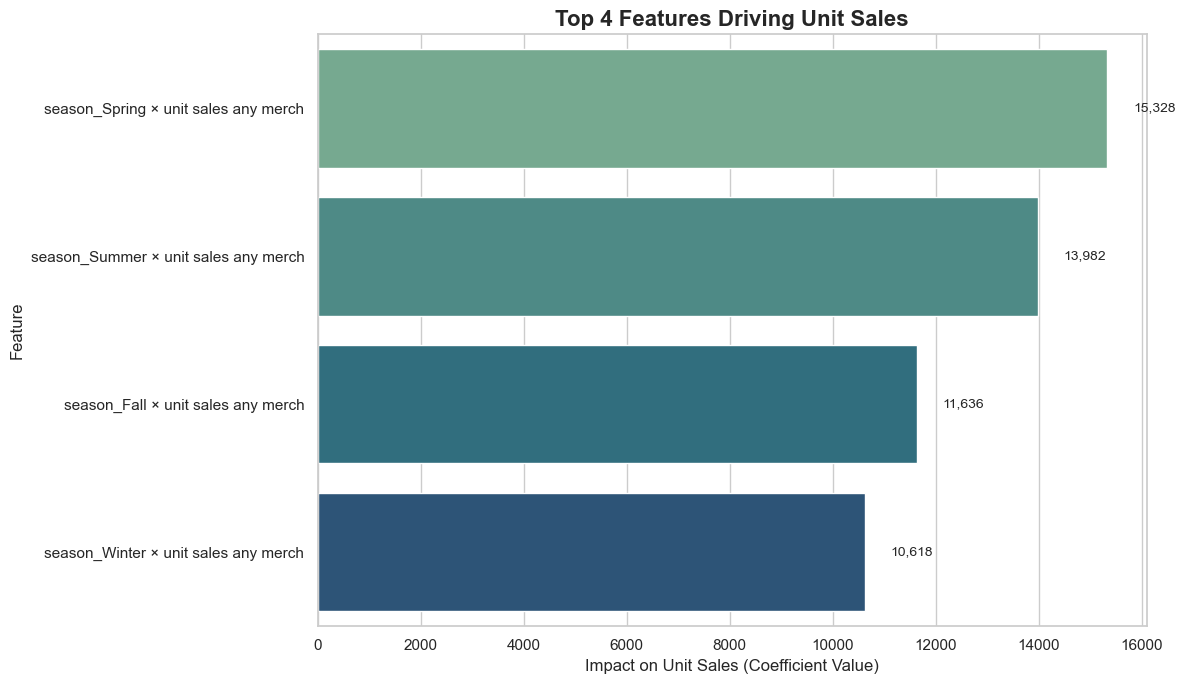

In [ ]:
# Set seaborn theme for aesthetics
sns.set_theme(style="whitegrid")

# Create horizontal bar chart
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=top_10_positive_features,
    x='Coefficient',
    y='Feature',
    palette='crest'
)

# Add titles and labels
plt.title('Top 4 Features Driving Unit Sales', fontsize=16, fontweight='bold')
plt.xlabel('Impact on Unit Sales (Coefficient Value)', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Add data labels to each bar
for i, (value, label) in enumerate(zip(top_10_positive_features['Coefficient'], top_10_positive_features['Feature'])):
    ax.text(value + 500, i, f'{value:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()